############################################################
####        EXAMPLE N°1 - STOCK KEEPING UNIT            ####
############################################################

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import xlwings as xw
from scipy.spatial.distance import cdist
from sklearn.cluster import AgglomerativeClustering
warnings.filterwarnings('ignore')
sns.set()

## Import Data Base

In [45]:
path =  r"C:\Users\sdiaz\OneDrive - Universidad Nacional de Colombia\Desktop\Foundations of Strategic Bussines Analytics\Week 1\SCRRIPTS\DATA_2.01_SKU.csv"
Fav_Data = pd.read_csv(path)
Fav_Data

,ADS,CV
0,1,0.68
1,3,0.40
2,1,0.59
3,2,0.39
4,9,0.11
...,...,...
95,1,0.65
96,2,0.28
97,2,0.69
98,10,0.55


#### Now let's have a look at our variables and see some summary statistics

In [46]:
Fav_Data.describe()

,ADS,CV
count,100.000000,100.000000
mean,5.610000,0.396000
std,4.211324,0.237317
min,1.000000,0.050000
25%,2.000000,0.130000
50%,3.000000,0.400000
75%,10.000000,0.590000
max,14.000000,0.960000


### Let's plot our data to see if we can identify groups visually 

[]

<Figure size 640x480 with 0 Axes>

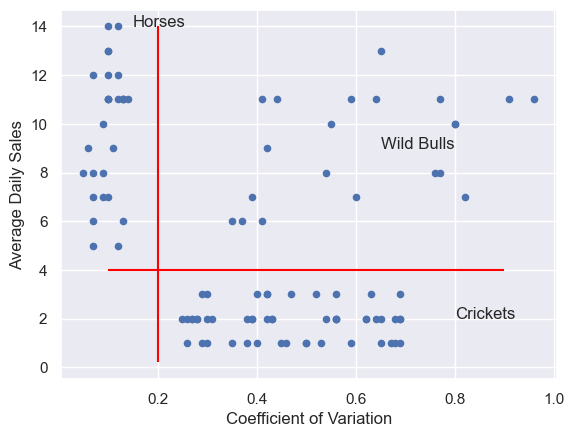

In [47]:
plt.figure(1)
Fav_Data.plot(kind="scatter",x="CV",y="ADS",ylabel="Average Daily Sales", xlabel= "Coefficient of Variation")
plt.vlines(x=0.2,ymin=0.2,ymax=14,colors="red")
plt.hlines(y=4,xmin=0.1,xmax=0.9,colors="red")
plt.text(0.15,14, "Horses") # we can add some text to our plot by using the text() function, here to label the group "Horses"
plt.text(0.65,9, "Wild Bulls") # and group "Wild Bulls"
plt.text(0.8,2, "Crickets") # and group "Crickets"
plt.plot()

array([[0.        , 2.01950489, 0.09      , ..., 1.00005   , 9.00093884,
        7.02829282],
       [2.01950489, 0.        , 2.00900473, ..., 1.04120123, 7.00160696,
        5.01223503],
       [0.09      , 2.00900473, 0.        , ..., 1.00498756, 9.00008889,
        7.02079768],
       ...,
       [1.00005   , 1.04120123, 1.00498756, ..., 0.        , 8.00122491,
        6.03403679],
       [9.00093884, 7.00160696, 9.00008889, ..., 8.00122491, 0.        ,
        2.06155281],
       [7.02829282, 5.01223503, 7.02079768, ..., 6.03403679, 2.06155281,
        0.        ]])

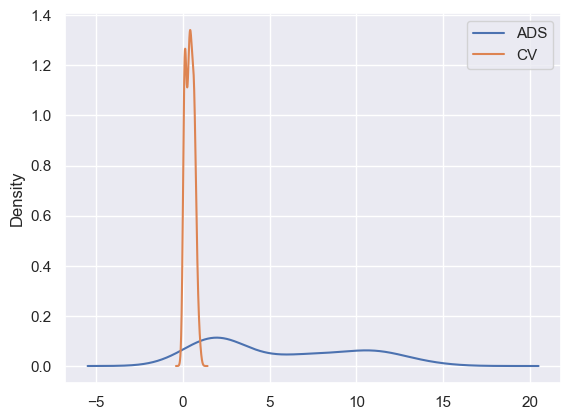

In [73]:
Fav_Data.plot.density()
distances = cdist(Fav_Data.values,Fav_Data.values, metric='euclidean')
distances

# the dist() function computes the distances of all the observations in our dataset

##### hclust() function performs hiearchical clustering, we pass it the distances, and we set the method argument to "ward.D"

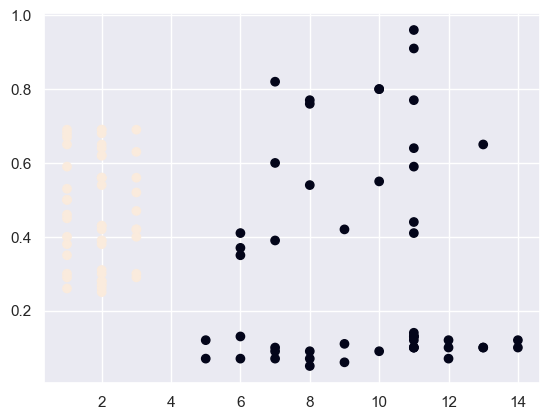

In [83]:
# Using Scikit-learn
hierarchical_cluster = AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage="ward")
labels = hierarchical_cluster.fit_predict(Fav_Data)
plt.scatter(Fav_Data["ADS"], Fav_Data["CV"],c=labels)
plt.show()
